# Block 1: Build Your Visualization Decision Matrix
## *Goal: Create a mental map of "business question → visualization choice"*

In [1]:
# Create your decision matrix (fill in as we go)
viz_decisions = {
    "What's the typical value?": "Histogram - shows distribution shape",
    "Do groups differ?": "Boxplot - compares distributions side by side",
    "Are two variables related?": "Scatter - shows correlation pattern",
    "How strong is relationship?": "Scatter + corr coefficient - quantifies it",
    "What's the trend over time?": "Line plot - shows temporal pattern"
}

1. When histogram vs boxplot?

Use histogram when: single variable distribution
Use boxplot when: comparing groups


2. What does mean >> median tell you on a histogram?

right skew; outliers with high values that offset the central tendancy of the rest of the data


3. What do non-overlapping boxplot boxes mean?

groups have very different values/relationships


4. What scatter pattern = strong positive correlation?

up and to the right (upward trend)

# Block 2: Guided Visualization Practice with Wine Data
### Task 1: "What's the typical alcohol content?"
**Create a histogram of alcohol with mean/median lines. After creating it, I'll ask you to interpret what you see.**
### Task 2: "Do high-quality wines have different acidity?"
**Create a boxplot comparing volatile acidity across quality scores. We'll discuss what the pattern means.**
### Task 3: "Does alcohol content predict quality?"
**Create a scatter plot of alcohol vs quality. We'll calculate correlation and discuss if it's useful.**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load wine data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url, sep=';')

# Quick inspection
print(df.shape)
print(df.columns.tolist())
df.head()

(1599, 12)
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


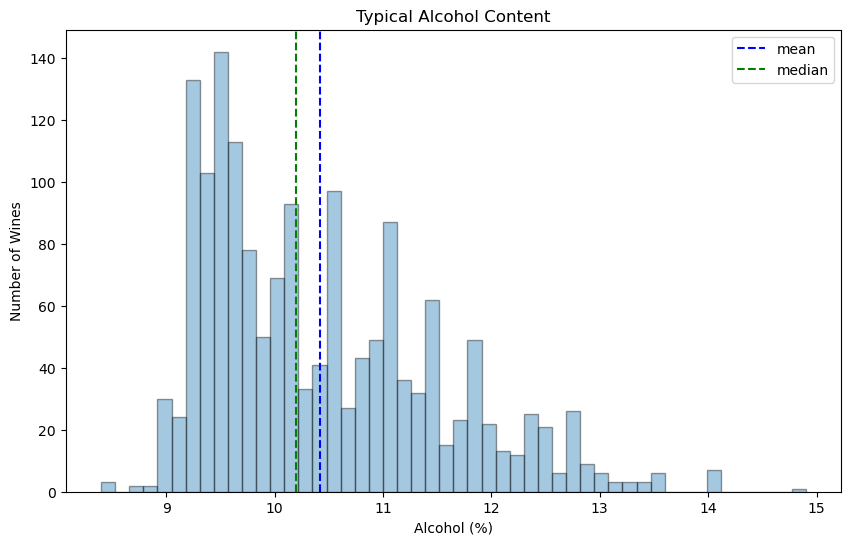

In [3]:
plt.figure(figsize=(10,6))
plt.hist(df['alcohol'], bins=50, edgecolor='black',alpha=0.4)
plt.axvline(df['alcohol'].mean(), linestyle='--', color='blue', label='mean')
plt.axvline(df['alcohol'].median(), linestyle='--', color='green', label='median')
plt.suptitle('')
plt.title('Typical Alcohol Content')
plt.xlabel('Alcohol (%)')
plt.ylabel('Number of Wines')
plt.legend()
plt.savefig('../../visuals/day12_hist1.png')
plt.show()

<Figure size 1000x600 with 0 Axes>

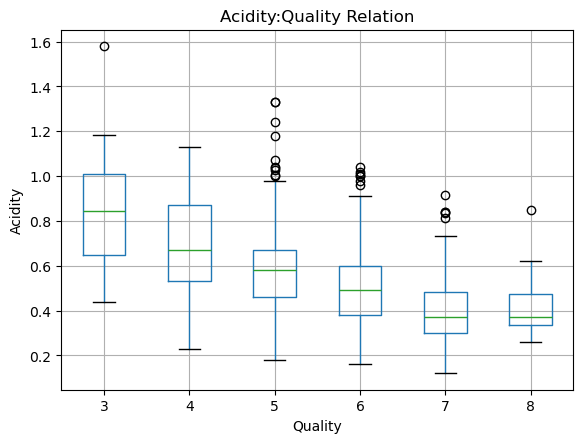

In [4]:
plt.figure(figsize=(10,6))
df.boxplot(column='volatile acidity', by='quality')
plt.suptitle('')
plt.title('Acidity:Quality Relation')
plt.xlabel('Quality')
plt.ylabel('Acidity')
plt.savefig('../../visuals/day12_box1.png')
plt.show()

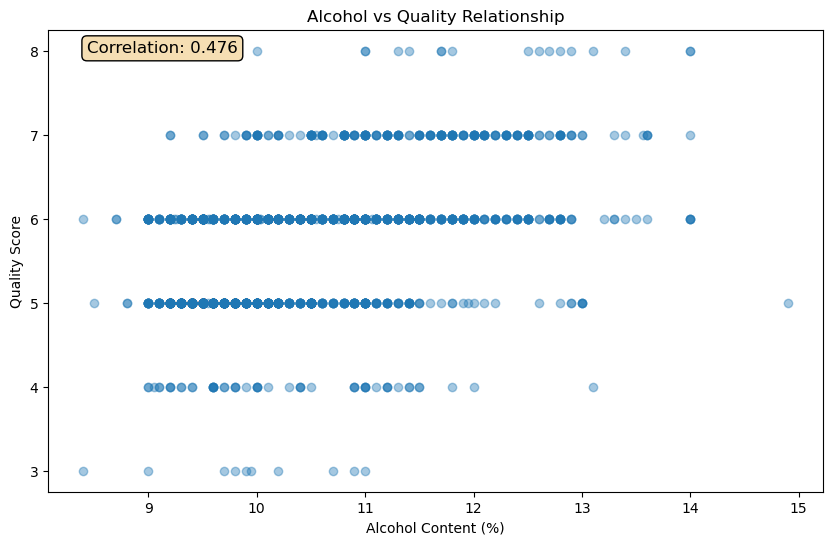

Correlation Coefficient: 0.476


In [5]:
plt.figure(figsize=(10,6))
plt.scatter(df['alcohol'],df['quality'],alpha=0.4)
plt.xlabel('Alcohol Content (%)')
plt.ylabel('Quality Score')
plt.title('Alcohol vs Quality Relationship')

corr = df['alcohol'].corr(df['quality'])
plt.text(0.05, 0.95, f'Correlation: {corr:.3f}',
         transform=plt.gca().transAxes, fontsize=12,
         bbox=dict(boxstyle='round', facecolor='wheat'))
plt.savefig('../../visuals/day12_scatter1.png')
plt.show()

print(f"Correlation Coefficient: {corr:.3f}")

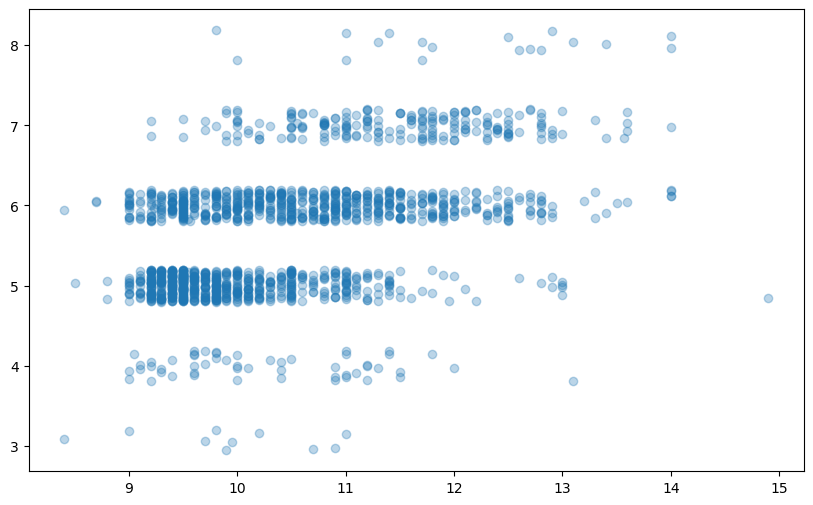

In [6]:
# Add jitter to see overlapping points
import numpy as np
plt.figure(figsize=(10, 6))
quality_jittered = df['quality'] + np.random.uniform(-0.2, 0.2, size=len(df))
plt.scatter(df['alcohol'], quality_jittered, alpha=0.3)